In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn


Accuracy: 0.8587
Precision: 0.9010
Recall: 0.8505
F1 Score: 0.8750


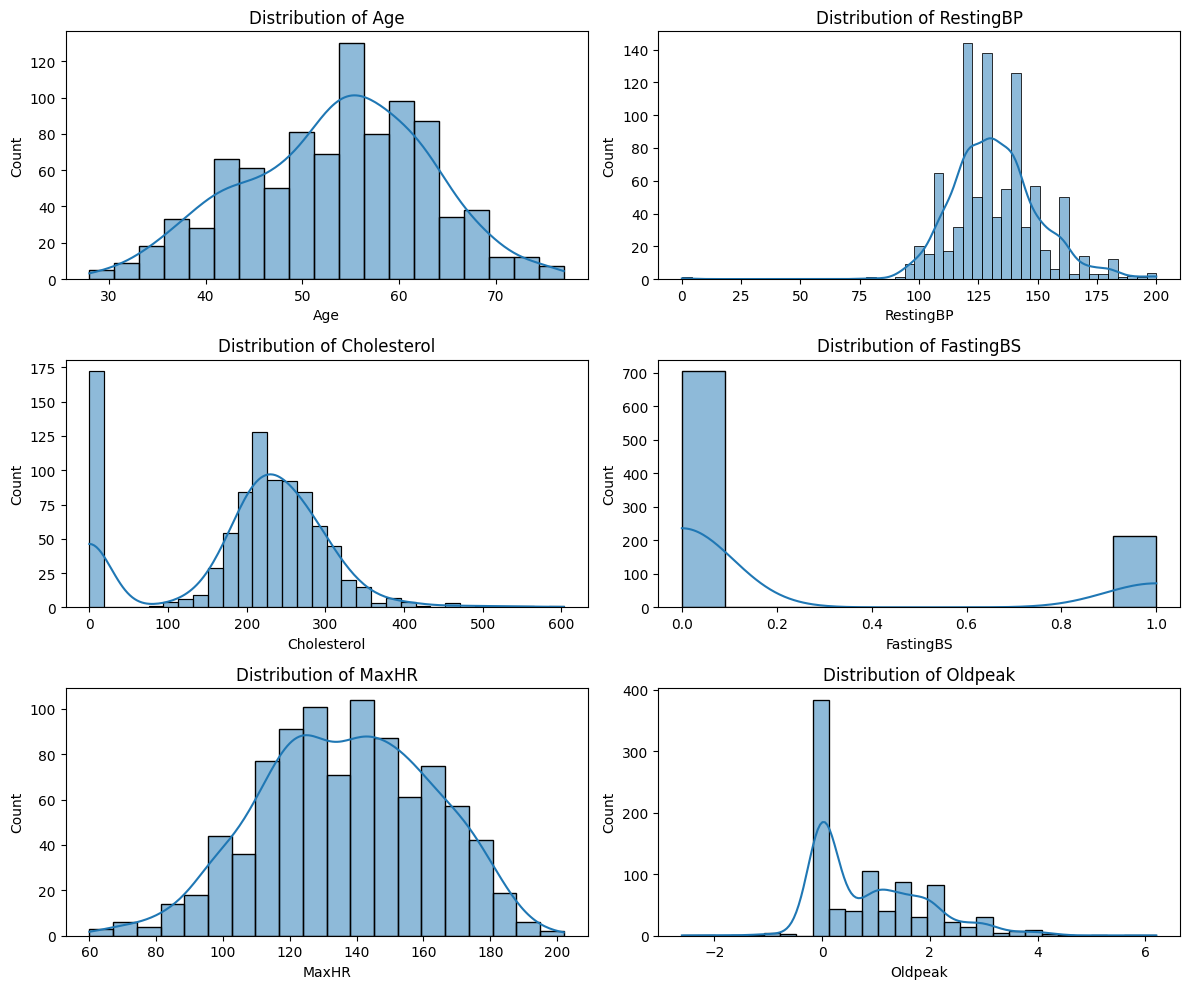

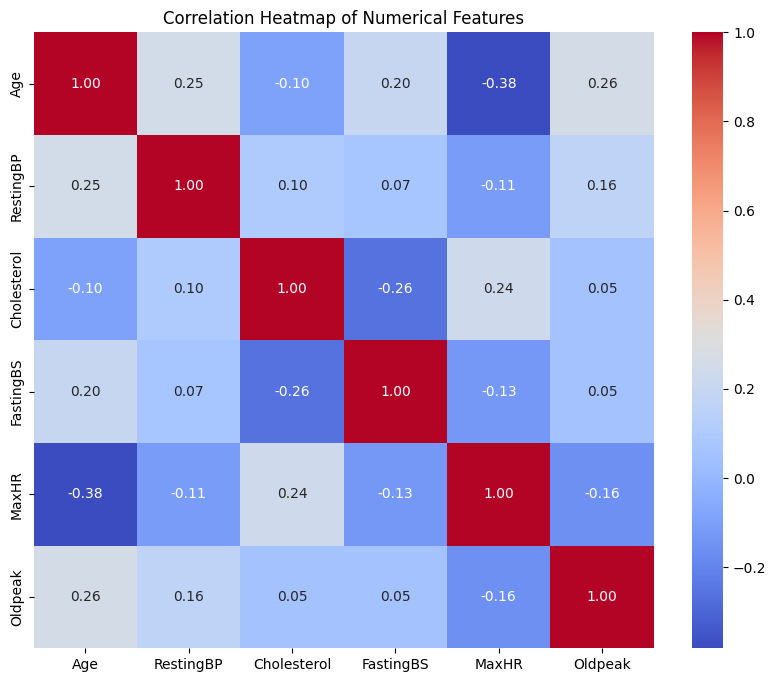

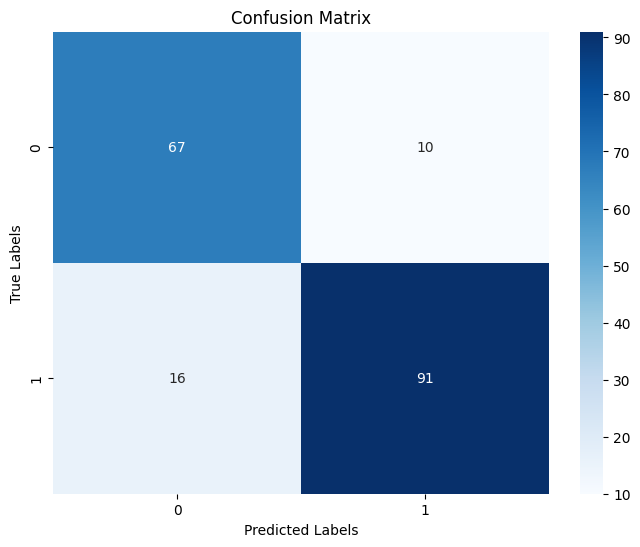

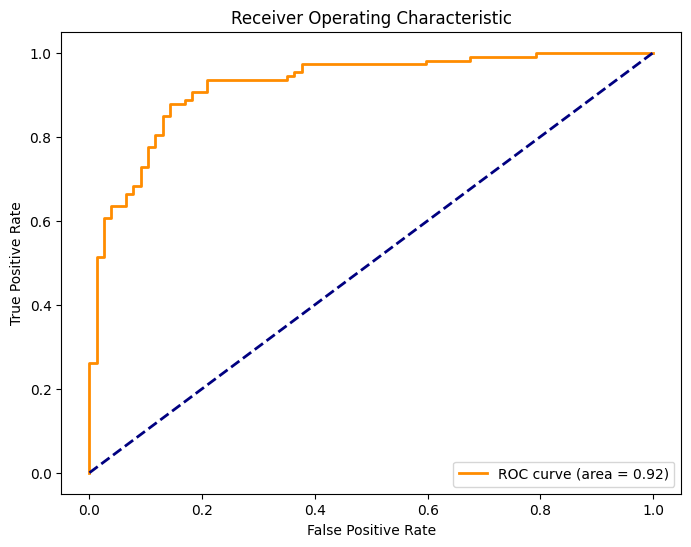

AttributeError: 'Pipeline' object has no attribute 'kernel'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('heart.csv')

# Identify categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Separate features and target
X = data.drop('HeartDisease', axis=1)  # Assuming 'HeartDisease' is target
y = data['HeartDisease']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Create SVM pipeline
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Hyperparameter tuning
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001],
    'classifier__kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

# Best model
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

# Evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


# Visualize distributions of key features
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
correlation = data[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Visualize model performance
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, best_svm.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature importance visualization (using coefficients for linear SVM)
if best_svm.kernel == 'linear':
    plt.figure(figsize=(10, 6))
    features = X.columns
    importance = np.abs(best_svm.coef_[0])
    indices = np.argsort(importance)
    plt.barh(range(len(indices)), importance[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.title('Feature Importance (Linear SVM)')
    plt.show()

Dataset Information:
Shape: (918, 12)

First few rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

--- Exploratory Data Analysis ---



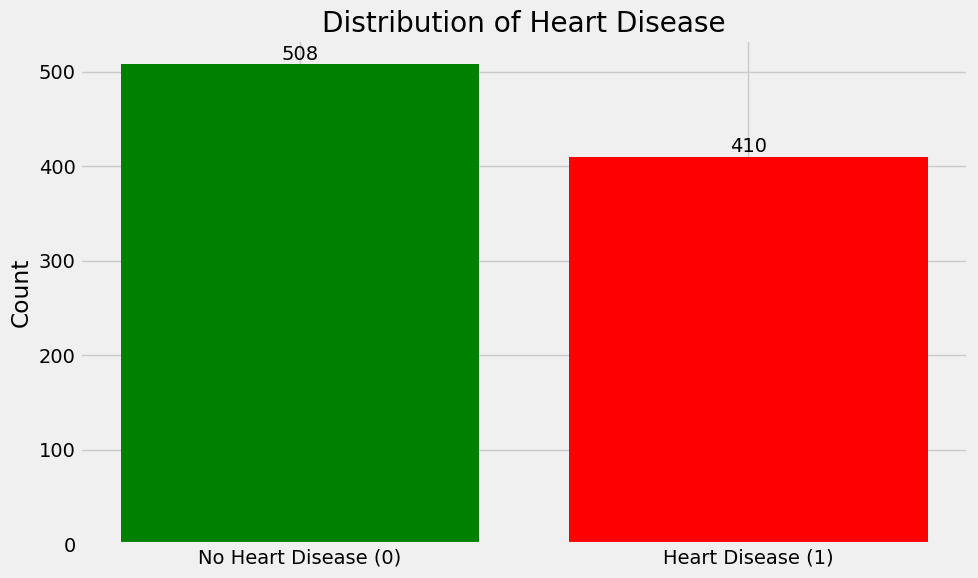

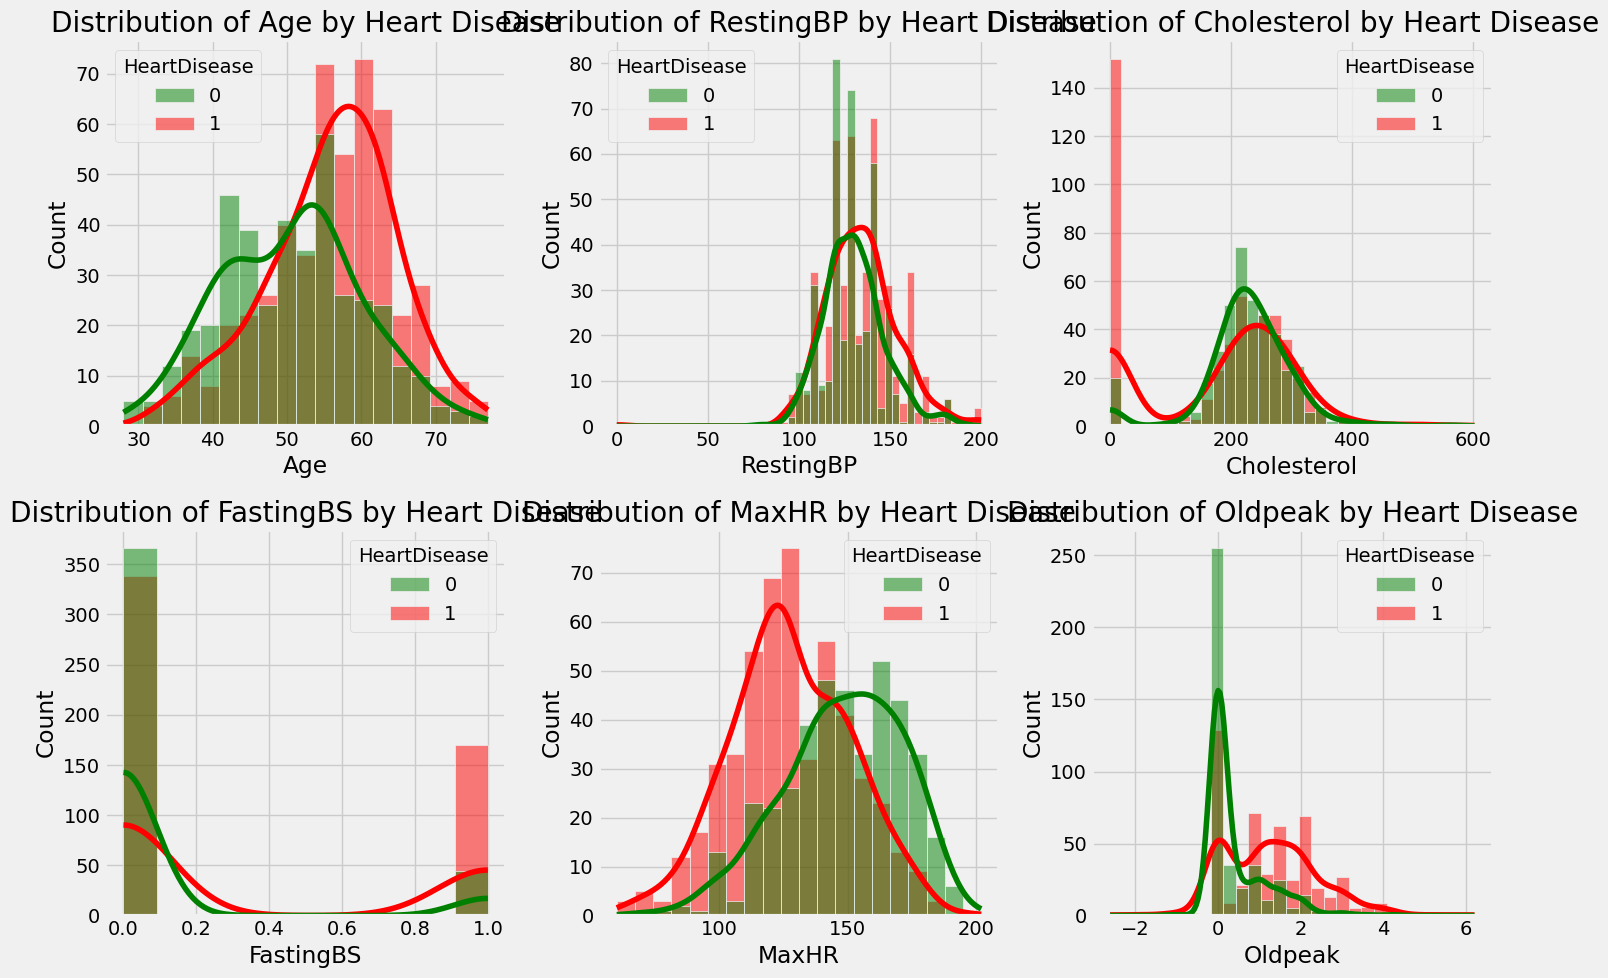

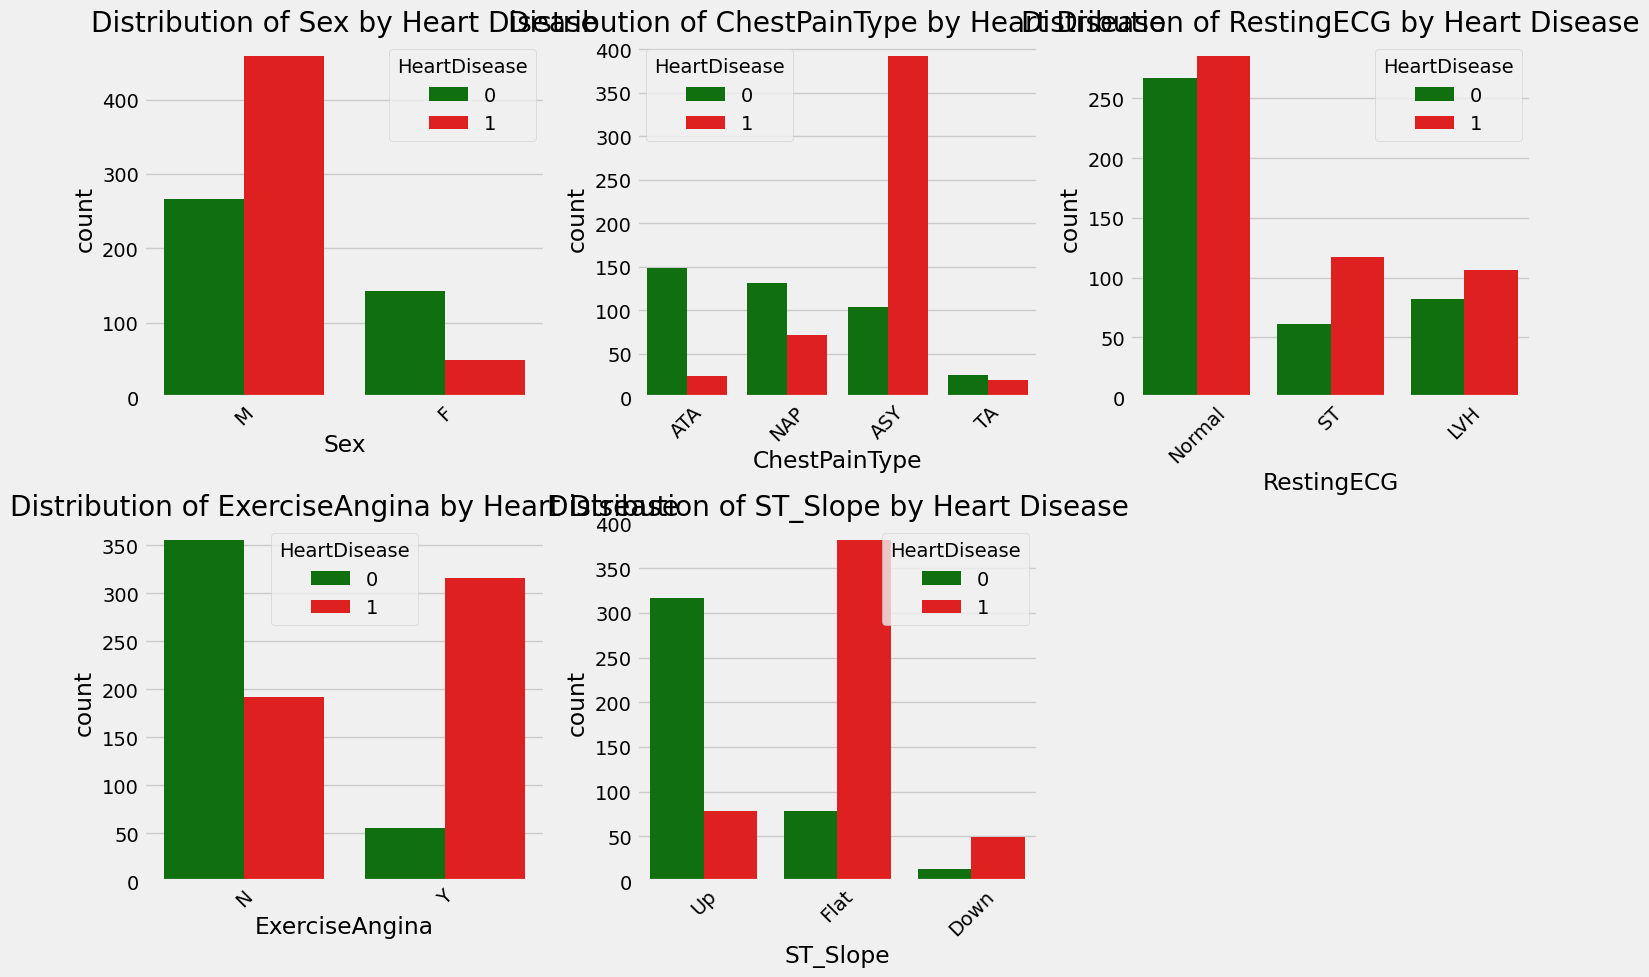

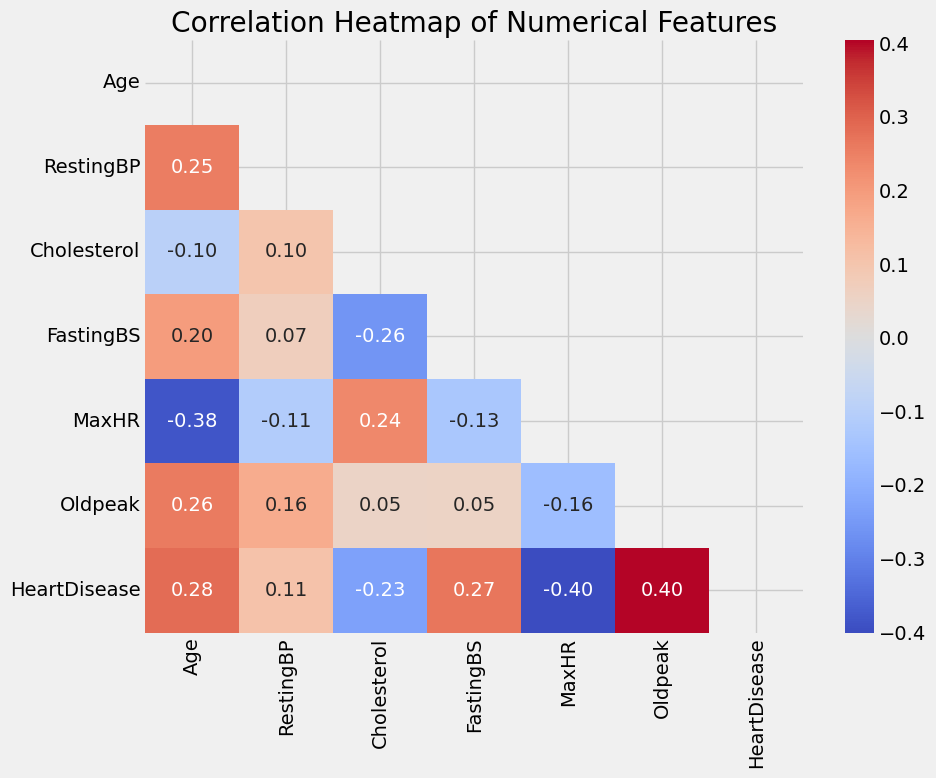

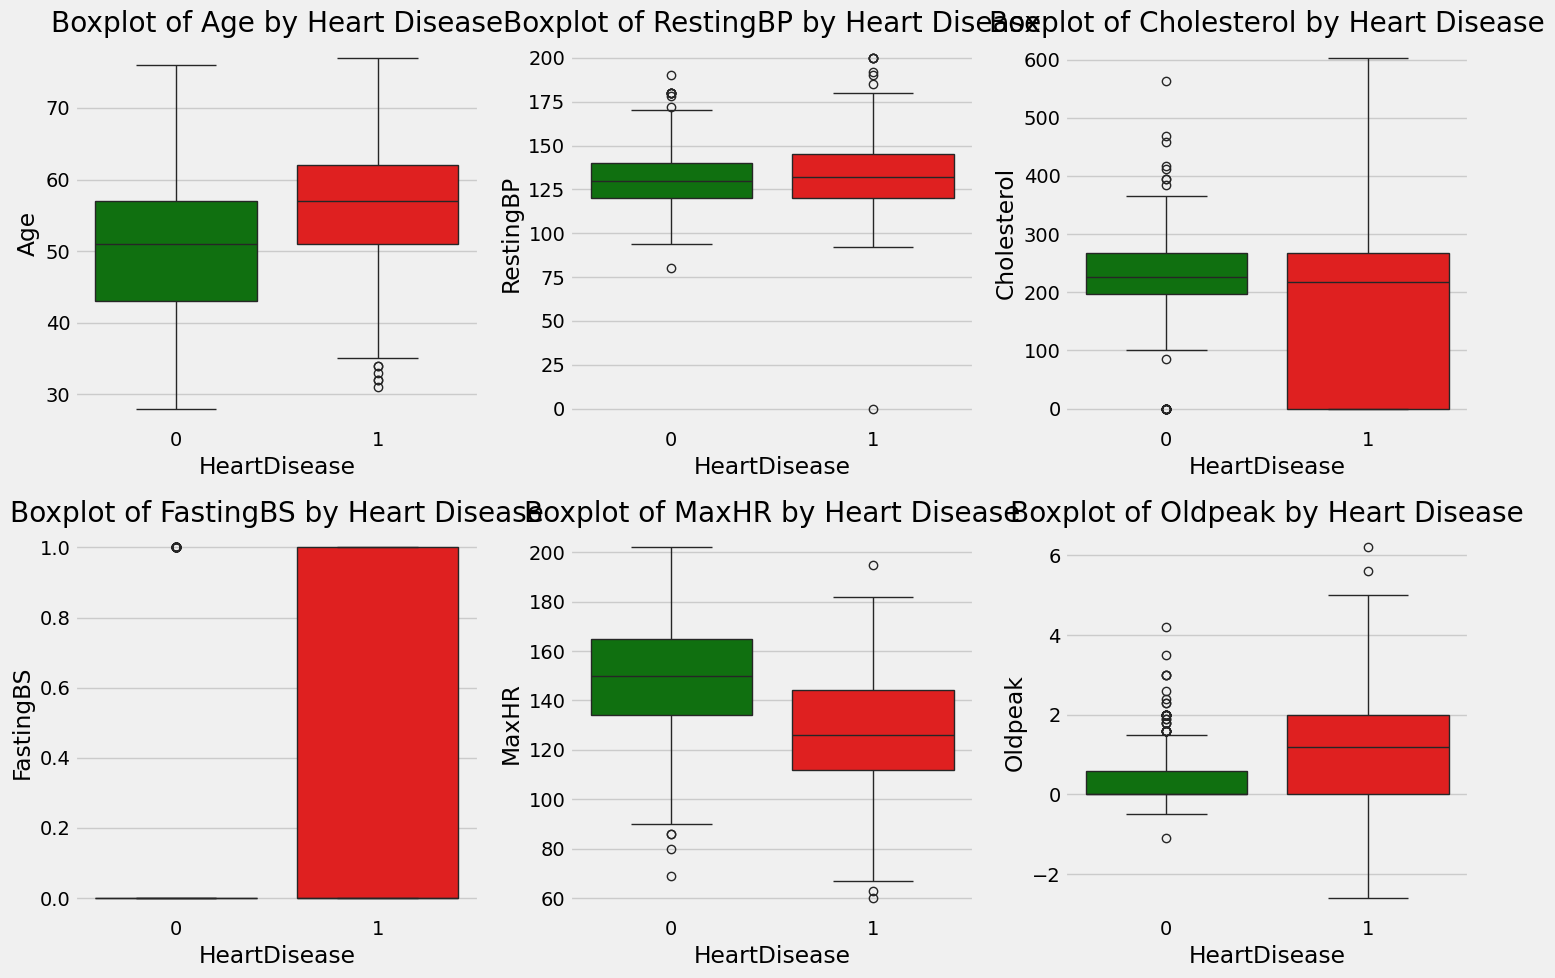

<Figure size 1200x1000 with 0 Axes>

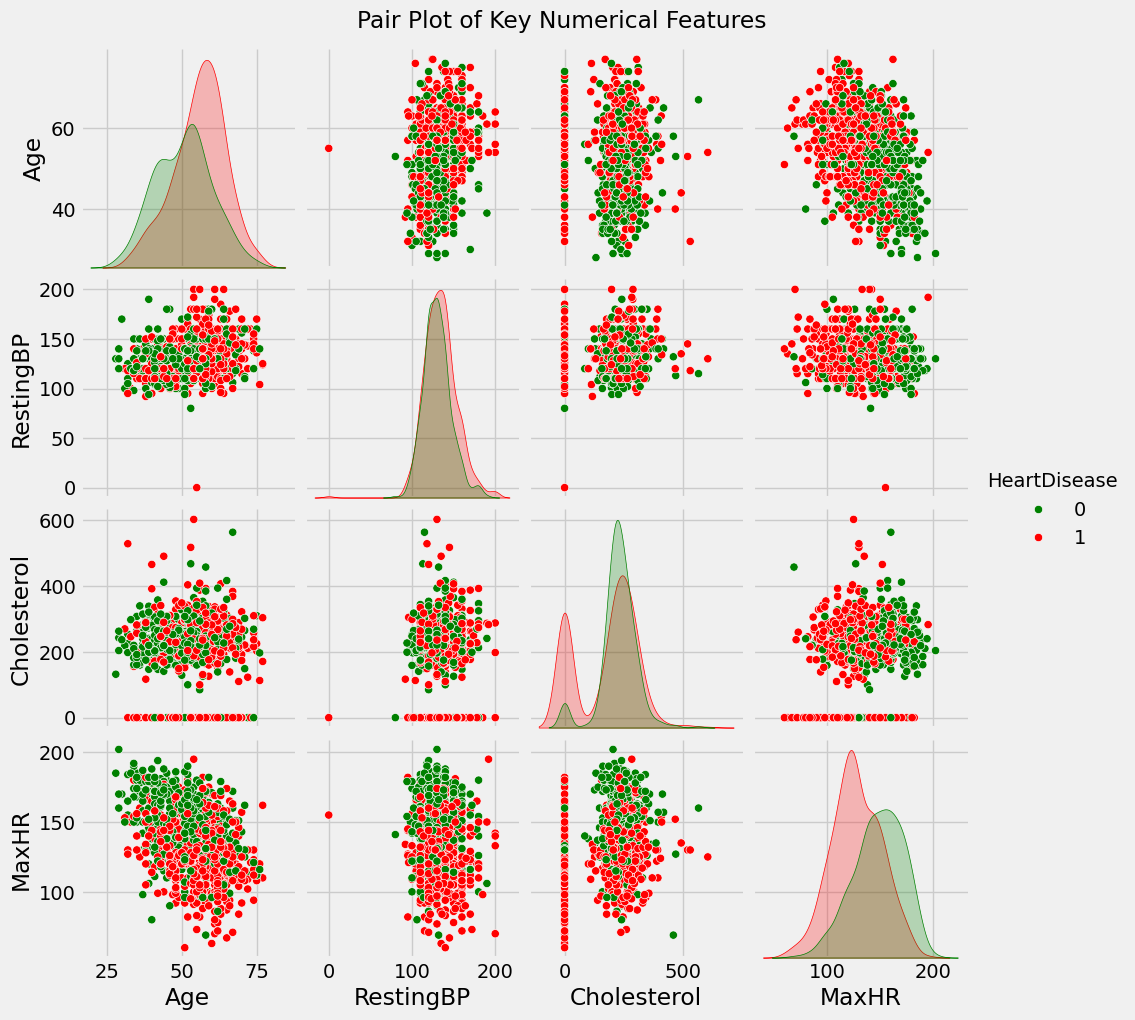


--- Data Preprocessing ---

Number of outliers in Age: 0
Number of outliers in RestingBP: 28
Number of outliers in Cholesterol: 183
Number of outliers in FastingBS: 214
Number of outliers in MaxHR: 2
Number of outliers in Oldpeak: 16
Training set shape: (734, 11)
Testing set shape: (184, 11)
Training set target distribution: {1: 406, 0: 328}
Testing set target distribution: {1: 102, 0: 82}

--- Model Training and Hyperparameter Tuning ---

Training SVM model with GridSearchCV...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best parameters: {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
Best cross-validation score: 0.8793

--- Model Evaluation ---

Model Performance Metrics:
Accuracy: 0.8804
Precision: 0.8922
Recall: 0.8922
F1 Score: 0.8922

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.89      0.89      0.89       102

    accurac

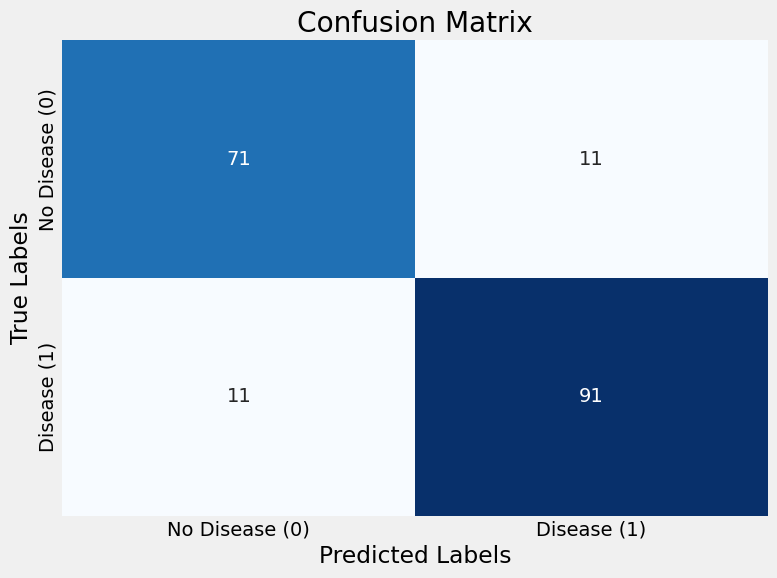

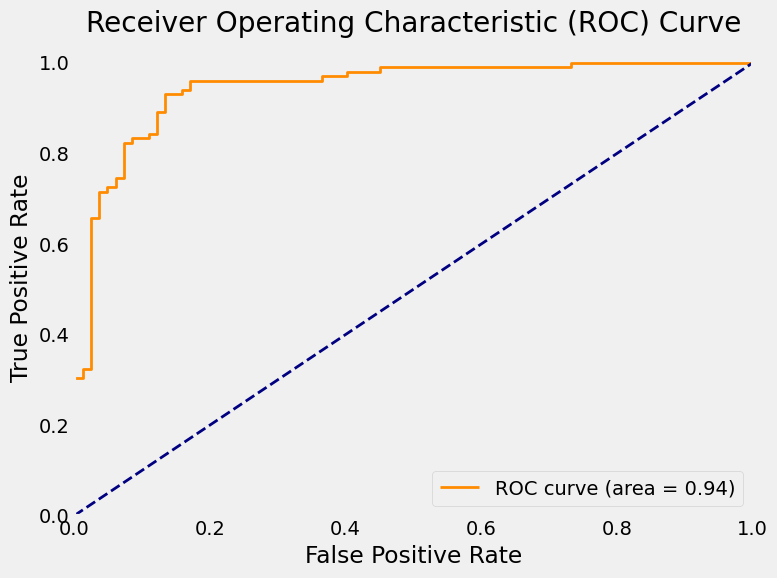

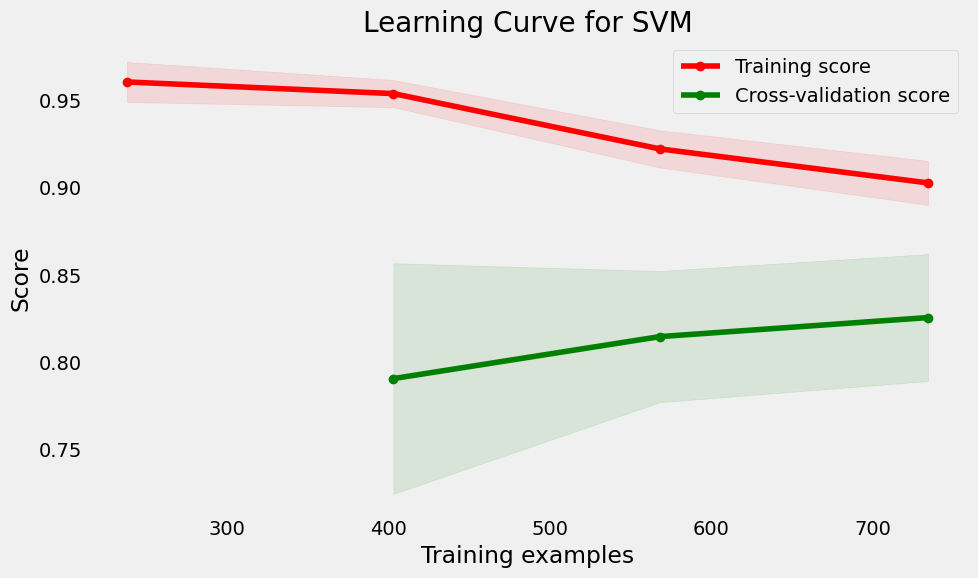

Feature importance visualization is only available for linear SVM kernel.
Current kernel: rbf

Using RFE to determine feature importance...


<Figure size 1200x800 with 0 Axes>

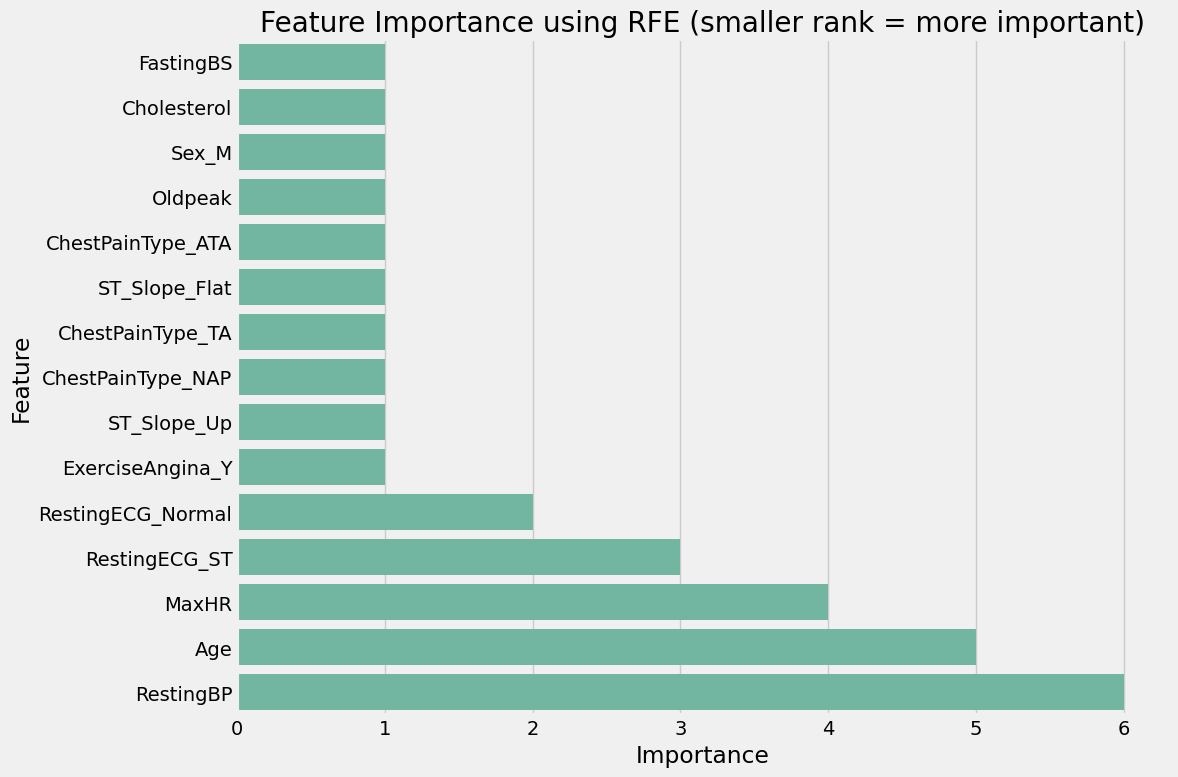

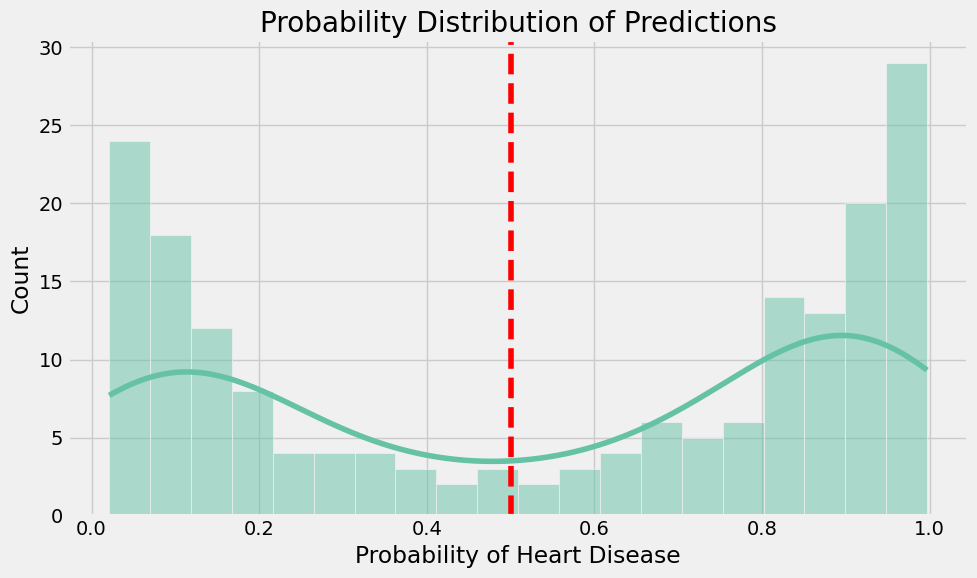


Top 2 important features: ['ST_Slope' 'Sex']

--- Model Summary ---

Best SVM Parameters: {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

Performance Metrics:
Accuracy: 0.8804
Precision: 0.8922
Recall: 0.8922
F1 Score: 0.8922
ROC AUC: 0.9449

Note about SVM and Epochs:
Unlike neural networks, SVM doesn't use 'epochs' in training. Instead, it uses an optimization
algorithm that runs until convergence or reaches a maximum number of iterations.
In this implementation, the max iterations parameter is: -1

Model saved as 'heart_failure_svm_model.pkl'

--- Completed Successfully ---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('fivethirtyeight')
sns.set_palette("Set2")

# Load dataset
data = pd.read_csv('heart.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(f"Shape: {data.shape}")
print("\nFirst few rows:")
print(data.head())

# Identify categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# =============================================================================
# 1. EXPLORATORY DATA ANALYSIS
# =============================================================================

print("\n--- Exploratory Data Analysis ---\n")

# Target variable distribution
plt.figure(figsize=(10, 6))
target_counts = data['HeartDisease'].value_counts()
plt.bar(['No Heart Disease (0)', 'Heart Disease (1)'], target_counts.values, color=['green', 'red'])
plt.title('Distribution of Heart Disease')
plt.ylabel('Count')
for i, count in enumerate(target_counts.values):
    plt.text(i, count+5, str(count), ha='center')
plt.tight_layout()
plt.savefig('target_distribution.png')
plt.show()

# Create a figure for all numerical feature distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=col, kde=True, hue='HeartDisease', palette=['green', 'red'])
    plt.title(f'Distribution of {col} by Heart Disease')
plt.tight_layout()
plt.savefig('numerical_distributions.png')
plt.show()

# Create a figure for all categorical feature distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='HeartDisease', data=data, palette=['green', 'red'])
    plt.title(f'Distribution of {col} by Heart Disease')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('categorical_distributions.png')
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
numerical_data = data[numerical_cols + ['HeartDisease']]
correlation = numerical_data.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

# Box plots for numerical features to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='HeartDisease', y=col, data=data, palette=['green', 'red'])
    plt.title(f'Boxplot of {col} by Heart Disease')
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

# Pair plot for key numerical features
plt.figure(figsize=(12, 10))
key_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'HeartDisease']
sns.pairplot(data[key_features], hue='HeartDisease', diag_kind='kde', palette=['green', 'red'])
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)
plt.savefig('pairplot.png')
plt.show()

# =============================================================================
# 2. DATA PREPROCESSING
# =============================================================================

print("\n--- Data Preprocessing ---\n")

# Check for outliers in numerical features using IQR method
def detect_outliers_iqr(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Print number of outliers in each numerical feature
for col in numerical_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"Number of outliers in {col}: {len(outliers)}")

# Separate features and target
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training set target distribution: {y_train.value_counts().to_dict()}")
print(f"Testing set target distribution: {y_test.value_counts().to_dict()}")

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# =============================================================================
# 3. MODEL TRAINING AND HYPERPARAMETER TUNING
# =============================================================================

print("\n--- Model Training and Hyperparameter Tuning ---\n")

# Create SVM pipeline
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [0.01, 0.1, 1, 'scale'],
    'classifier__kernel': ['linear', 'rbf', 'poly']
}

# Create GridSearchCV with cross-validation
grid = GridSearchCV(
    svm_pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# Fit the model
print("Training SVM model with GridSearchCV...")
grid.fit(X_train, y_train)

# Best model and parameters
print(f"\nBest parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.4f}")

# Get the best model
best_svm = grid.best_estimator_

# =============================================================================
# 4. MODEL EVALUATION
# =============================================================================

print("\n--- Model Evaluation ---\n")

# Predict on test data
y_pred = best_svm.predict(X_test)
y_pred_proba = best_svm.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# =============================================================================
# 5. VISUALIZING MODEL PERFORMANCE
# =============================================================================

print("\n--- Visualizing Model Performance ---\n")

# 5.1 Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0.5, 1.5], ['No Disease (0)', 'Disease (1)'])
plt.yticks([0.5, 1.5], ['No Disease (0)', 'Disease (1)'])
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# 5.2 ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(False)
plt.tight_layout()
plt.savefig('roc_curve.png')
plt.show()

# 5.3 Learning Curves
def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve for SVM")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.tight_layout()
    return plt

plot_learning_curve(best_svm, X, y, cv=5, n_jobs=-1)
plt.savefig('learning_curve.png')
plt.show()

# 5.4 Feature Importance
# For SVM with linear kernel, we can extract coefficients as feature importance
plt.figure(figsize=(12, 8))

if best_svm.named_steps['classifier'].kernel == 'linear':
    # Extract feature names after preprocessing
    preprocessor = best_svm.named_steps['preprocessor']
    cat_features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)
    feature_names = np.append(numerical_cols, cat_features)

    # Get coefficients from the SVM model
    coefficients = best_svm.named_steps['classifier'].coef_[0]

    # Create a DataFrame with features and their coefficients
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

    # Plot the feature importance
    sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(15))
    plt.title('Top 15 Features Importance (Linear SVM)')
    plt.tight_layout()
    plt.savefig('feature_importance_linear.png')
    plt.show()
else:
    print("Feature importance visualization is only available for linear SVM kernel.")
    print(f"Current kernel: {best_svm.named_steps['classifier'].kernel}")

    # Alternative: Use RFE for feature importance for non-linear kernels
    print("\nUsing RFE to determine feature importance...")

    # Preprocess data first
    X_train_preprocessed = preprocessor.fit_transform(X_train)

    # Create a new SVM with linear kernel for RFE
    svm_linear = SVC(kernel='linear')

    # Use RFE to select top features
    rfe = RFE(estimator=svm_linear, n_features_to_select=10, step=1)
    rfe.fit(X_train_preprocessed, y_train)

    # Get feature names
    cat_features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)
    feature_names = np.append(numerical_cols, cat_features)

    # Create a DataFrame with features and their ranking
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': rfe.ranking_
    })
    feature_importance = feature_importance.sort_values('Importance')

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Feature Importance using RFE (smaller rank = more important)')
    plt.tight_layout()
    plt.savefig('feature_importance_rfe.png')
    plt.show()

# 5.5 Probability Distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba, kde=True, bins=20)
plt.axvline(x=0.5, color='r', linestyle='--')
plt.title('Probability Distribution of Predictions')
plt.xlabel('Probability of Heart Disease')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('probability_distribution.png')
plt.show()

# 5.6 Decision Region Visualization - For the most significant features
from sklearn.inspection import permutation_importance

# Get feature importance using permutation importance
result = permutation_importance(best_svm, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
})
importance = importance.sort_values('Importance', ascending=False)
top_features = importance['Feature'].values[:2]

print(f"\nTop 2 important features: {top_features}")

# =============================================================================
# 6. SUMMARY
# =============================================================================

print("\n--- Model Summary ---\n")
print(f"Best SVM Parameters: {grid.best_params_}")
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Note about SVM and epochs
print("\nNote about SVM and Epochs:")
print("Unlike neural networks, SVM doesn't use 'epochs' in training. Instead, it uses an optimization")
print("algorithm that runs until convergence or reaches a maximum number of iterations.")
print(f"In this implementation, the max iterations parameter is: {best_svm.named_steps['classifier'].max_iter}")

# Save the model
import joblib
joblib.dump(best_svm, 'heart_failure_svm_model.pkl')
print("\nModel saved as 'heart_failure_svm_model.pkl'")

print("\n--- Completed Successfully ---")


Rows removed: 0
Remaining rows: 746
Dataset Shape: (746, 12)

First few rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

--- Data Preprocessing ---

Training set shape: (596, 11)
Testing set shape: (150, 11)
Training set target distribution: {0: 312

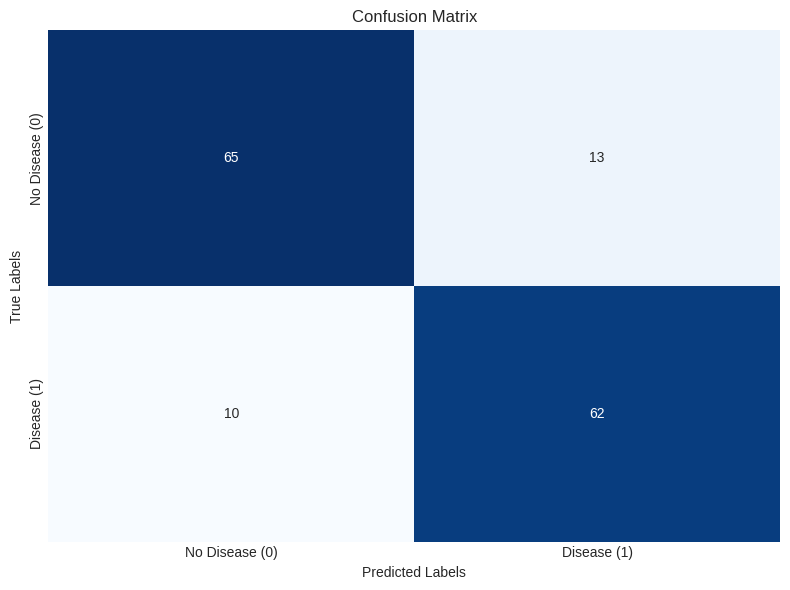

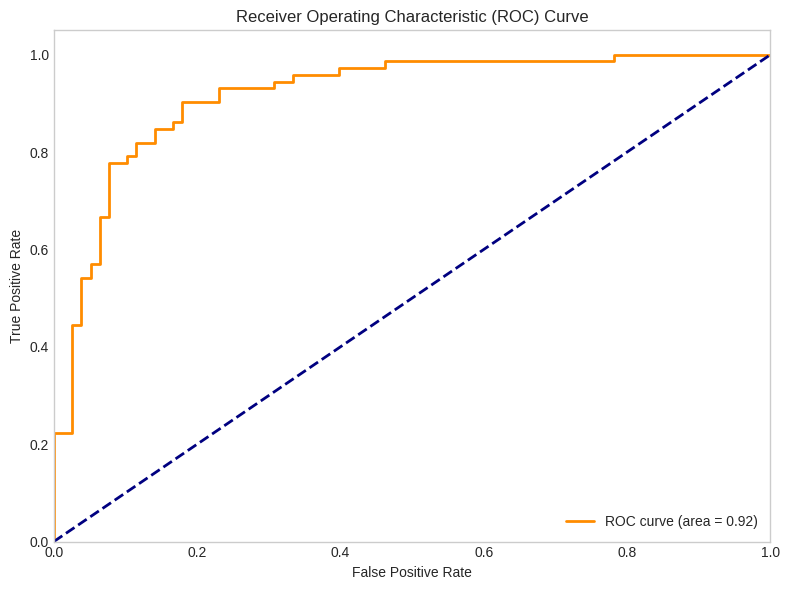

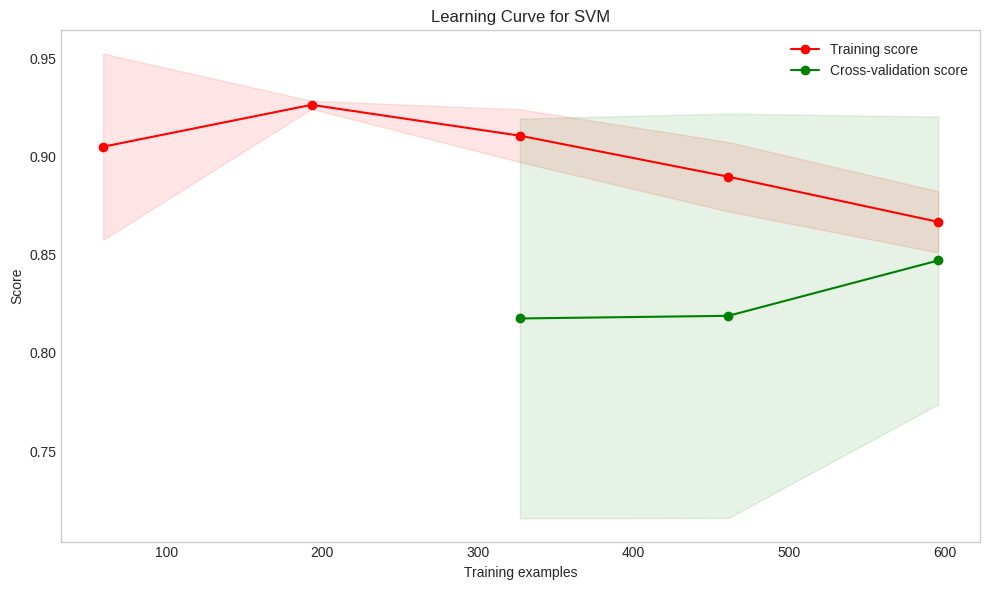

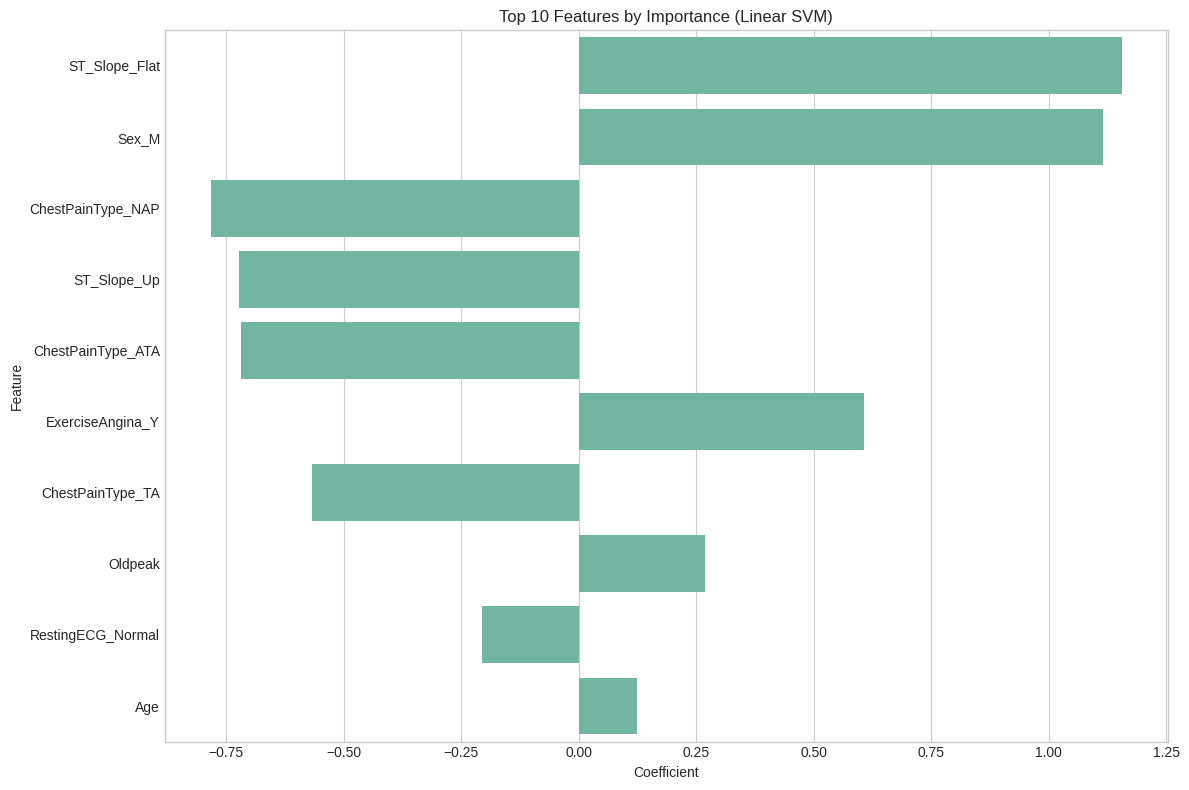


--- Model Summary ---

Best SVM Parameters: {'classifier__C': 1, 'classifier__gamma': 0.01, 'classifier__kernel': 'linear'}

Performance Metrics:
Accuracy: 0.8467
Precision: 0.8267
Recall: 0.8611
F1 Score: 0.8435
ROC AUC: 0.9179
Max iterations parameter is: -1


['heart_failure_svm_model.pkl']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Load dataset
# https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
data = pd.read_csv('heart.csv')

data = data[data['Cholesterol'] > 0]

# Identify categorical and numerical columns based on data types
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

print("\n--- Data Preprocessing ---\n")

# features and target separation
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training set target distribution: {y_train.value_counts().to_dict()}")
print(f"Testing set target distribution: {y_test.value_counts().to_dict()}")

# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# TRAINING AND HYPERPARAMETER TUNING
print("\n--- Model Training and Hyperparameter Tuning ---\n")

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [0.01, 0.1, 1, 'scale'],
    'classifier__kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(
    svm_pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

print("Training SVM model with GridSearchCV...")
grid.fit(X_train, y_train)

print(f"\nBest parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.4f}")

best_svm = grid.best_estimator_


# EVALUATION

print("\n--- Model Evaluation ---\n")

# Predict on test data
y_pred = best_svm.predict(X_test)
y_pred_proba = best_svm.predict_proba(X_test)[:, 1]

# evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# VISUALIZATIONS

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0.5, 1.5], ['No Disease (0)', 'Disease (1)'])
plt.yticks([0.5, 1.5], ['No Disease (0)', 'Disease (1)'])
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(False)
plt.tight_layout()
plt.savefig('roc_curve.png')
plt.show()

# Eval SUMMARY
print("\n--- Model Summary ---\n")
print(f"Best SVM Parameters: {grid.best_params_}")
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

print(f"Max iterations parameter is: {best_svm.named_steps['classifier'].max_iter}")

# Save the model for future use
import joblib
joblib.dump(best_svm, 'heart_failure_svm_model.pkl')
